Bibliotecas utilizadas

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Caminho da URL do arquivo utilizado para o estudo

In [85]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(url)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Renomeando nomes das variáveis e de seus atributos para melhor entendimento dos dados

In [86]:
mapa = {
    'unfinished' : 'inacabado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

df = df.rename(columns=mapa)

troca = {
    0 : 1,
    1 : 0
}
df['finalizado'] = df.inacabado.map(troca)

In [87]:
df.head()

,inacabado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


Separação entre as features  e as variáveis de classificação

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

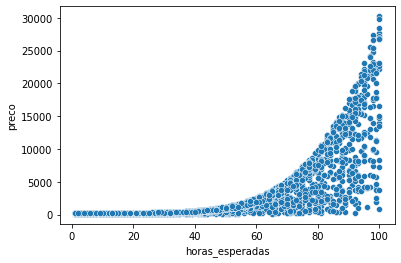

In [88]:
sns.scatterplot(x='horas_esperadas', y='preco', data=df)

Marcação das variáveis classificatórias de acordo com a variável resposta (finalizado: 0 = não finalizado e 1 = finalizado) dos meus dados

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

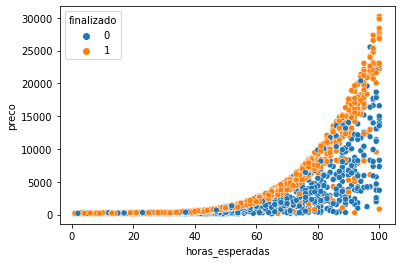

In [89]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado',data=df)

Separação da variável resposta (finalizado) de acordo com as variáveis de classificação (horas_esperadas e preco)

Observação: há um padrão de no comportamento do preço pago com as horas esperadas para os projeto finalizados (finalizado = 1)

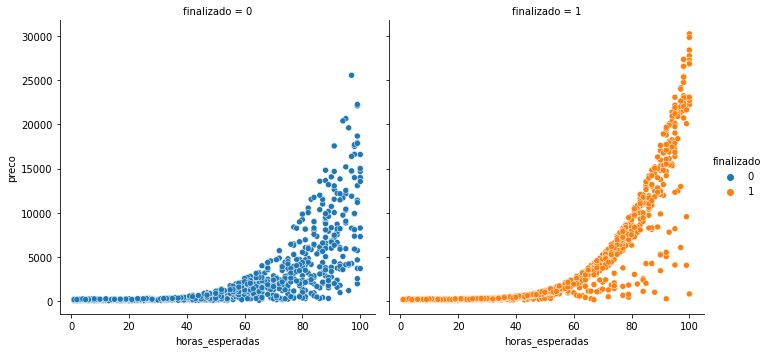

In [90]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado',data=df)

Iniciando então a modelagem

In [91]:
# Features
x = df[['horas_esperadas', 'preco']]

# Resposta 
y = df['finalizado']

In [92]:
# Fixação da aleatoriedade
SEED = 78

# Extratificação de acordo com a variável resposta indicada
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print('Foi utilizado %d elemento para treino e %d para teste' % (len(treino_x),len(teste_x)))

modelo = LinearSVC()

# Treinando o modelo
modelo.fit(treino_x, treino_y)

# Modelo prevendo baseado no teste
previsoes = modelo.predict(teste_x)

# Acurácia do modelo (quanto o modelo acertou)
acuracia = accuracy_score(teste_y, previsoes)*100
print('A acurácia foi de %.2f%%' % acuracia)

Foi utilizado 1617 elemento para treino e 540 para teste
A acurácia foi de 53.15%


c:\Users\Bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sugerindo um algoritmo em que todos os projetos serão finalizados e analisando o desempenho do modelo e sua acurácia

In [93]:
# Previsões de base
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' % acuracia)

A acurácia do algoritmo de baseline foi de 52.59%


Com isso, meu modelo não é muito bom, pois é acerta tanto quanto um modelo na qual diz que todos os dados foram finalizados.

Analisando os meus dados de teste para tentar traçar uma 'linha' explicativa para meu modelo (se está em um certo ponto, há chances ou não do projeto ser finalizado? Qual a taxa de acerto dessa 'linha' traçada?)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

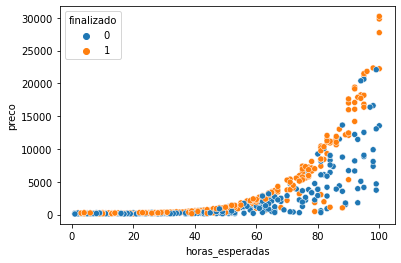

In [94]:
# Dados plotados de teste
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y ,data=teste_x)

Dentro das minhas variáveis de teste, especificar quais são os limites de cada variável, ou seja, máximos e mínimos de horas esperadas no projeto e valor a ser pago no projeto

In [95]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max, y_min, y_max)

1 100 102 30223


Mesclagem de informações das variáveis para definir a curva esperada

In [96]:
pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

In [97]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

Prevendo o modelo para essa série de pontos criados

In [98]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Users\Bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

Plotando os valores dos pontos criados para as variáveis horas_esperadas e preco dentro do meu espaço anteriomente determinado nos dados de treino

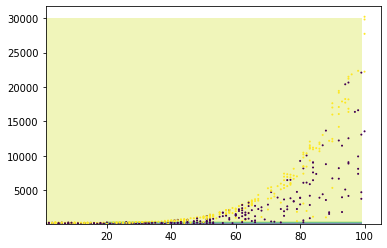

In [99]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY (CURVA DE DECISÃO)

A curva de decisão não explica os dados, está ruim esse estimador, isso devido ao método utilizar retas para criar seu modelo.

Utilizando um novo argumento que retira a aleatoriedade, com intuito de melhorar o estimador, que não seja somente linear (SVC)

Reescalando as duas variáveis para que fique padronizadas em faixas de valores específicos

In [102]:
SEED = 78
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

# Reescalando as variáveis para deixar padrão os intervalos
scaler = StandardScaler()

# Treinando e testando as variáveis reescaladas
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#modelo = LinearSVC()

Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi 67.90%


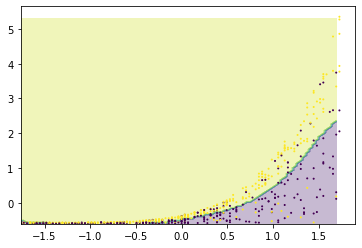

In [103]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixel = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY (CURVA DE DECISÃO)

De acordo com o resultado da acurácia do modelo, podemos enxergar que houve uma maior taxa de acerto (acurácia = 67,90%) e também vemos que o modelo aprendeu a curva a ponto de separar visualmente os projetos que seriam terminados de acordo com o valor disposto a pagar e o tempo estipulado para a finalização do projeto.